In [25]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('fivethirtyeight')

# get the data 

In [26]:
df = pd.read_excel('9.14.2017 impact analysis.xlsx',index_col='date_requested',\
                  parse_dates=['date_requested','date_completed'])
df = df[['wo_id','date_completed','prob_type']]
df['duration'] = df.date_completed - df.index
df['fiscal_year'] = np.where(df.index.month >= 7,df.index.year+1, df.index.year)

# checkout what the data looks like

In [27]:
df.sort_index(inplace=True)
df

,wo_id,date_completed,prob_type,duration,fiscal_year
date_requested,,,,,
2013-10-11,1.0,2015-08-27,TEST(DO NOT USE),685 days,2014
2013-10-16,2.0,2013-10-23,FENCE_GATE,7 days,2014
2013-10-16,6.0,2013-10-16,PLUMB/OTHER,0 days,2014
2013-10-16,7.0,2013-10-17,PAINT,1 days,2014
2013-10-16,8.0,NaT,HVAC,NaT,2014
2013-10-16,9.0,2013-10-21,ROOF,5 days,2014
2013-10-16,10.0,2013-10-21,PAINT,5 days,2014
2013-10-16,11.0,2013-10-16,PLUMB/OTHER,0 days,2014
2013-10-16,20.0,2013-10-23,CEILTILE,7 days,2014


# filter to get dataframe with only work orders requested in that fiscal year and in doing this exclude all 'test' work orders.

In [28]:
fy_list = []
fy_dfs = []
for year in df.fiscal_year.unique():
    fy_dfs.append(df.loc[(df.fiscal_year==year) &\
                    (df.prob_type != 'TEST(DO NOT USE)')])
    fy_list.append(year)
fy_dfs = dict(zip(fy_list,fy_dfs))

# get and store the total number of work orders that were requested in each fiscal year. 

In [29]:
work_order_volume = []
for key, value in fy_dfs.items():
    work_order_volume.append(value.wo_id.count())
work_order_volume = dict(zip(fy_list,work_order_volume))
work_order_volume

{2014: 12209, 2015: 14521, 2016: 16668, 2017: 17193, 2018: 3338}

# drop work orders that were not closed in each fiscal year

In [30]:
cleaned_fy_dfs = []
for key, value in fy_dfs.items():
    cleaned_fy_dfs.append(value[value.date_completed.notnull()])
cleaned_fy_dfs = dict(zip(fy_list,cleaned_fy_dfs))
cleaned_fy_dfs.values()

dict_values([                  wo_id date_completed      prob_type duration  fiscal_year
date_requested                                                             
2013-10-16          2.0     2013-10-23     FENCE_GATE   7 days         2014
2013-10-16          6.0     2013-10-16    PLUMB/OTHER   0 days         2014
2013-10-16          7.0     2013-10-17          PAINT   1 days         2014
2013-10-16          9.0     2013-10-21           ROOF   5 days         2014
2013-10-16         10.0     2013-10-21          PAINT   5 days         2014
2013-10-16         11.0     2013-10-16    PLUMB/OTHER   0 days         2014
2013-10-16         20.0     2013-10-23       CEILTILE   7 days         2014
2013-10-16         14.0     2014-04-07           HVAC 173 days         2014
2013-10-16         15.0     2014-04-07           HVAC 173 days         2014
2013-10-16         16.0     2014-01-08       CEILTILE  84 days         2014
2013-10-16         18.0     2014-03-04           HVAC 139 days         2014

# add columns for the following: 
1. work order volume by problem type
2. average duration by problem type
3. status for whether or not specific work orders 'hit' or 'missed' on timem


In [31]:
for key, value in cleaned_fy_dfs.items():
    value['count'] = value.groupby(['prob_type'])['prob_type'].transform('count')
    value['avg_duration'] = (value.groupby(['prob_type'])['duration'].\
                        transform('sum') / value['count'])
    value['on_time'] = np.where(value.duration <= value.avg_duration,'hit','miss')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

# display the the work orders closed on time ( divide the number of work orders closed on time by the total number of work orders received )

In 2014, 67.17 pct of work orders were closed on time.
In 2015, 76.25 pct of work orders were closed on time.
In 2016, 74.56 pct of work orders were closed on time.
In 2017, 67.88 pct of work orders were closed on time.
In 2018, 46.46 pct of work orders were closed on time.


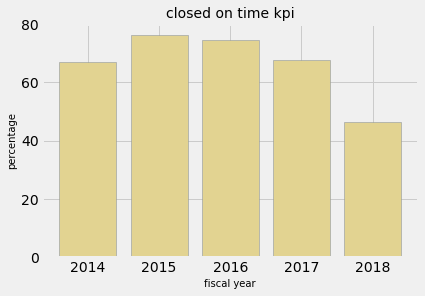

In [34]:
pct_timely_kpi = []
for year in fy_list:
    pct_timely_kpi.append(cleaned_fy_dfs[year].on_time.value_counts()[0]/ \
         work_order_volume[year]*100)
    print('In {}, {} pct of work orders were closed on time.'.\
         format(year,round(cleaned_fy_dfs[year].on_time.value_counts()[0]/ \
         work_order_volume[year]*100,2)))
pct_timely_kpi = dict(zip(fy_list,pct_timely_kpi))

plt.bar(range(len(fy_list)),list(pct_timely_kpi.values()),color='#e2d391',\
        edgecolor='#868e99',align='center')
plt.xticks(range(len(fy_list)),list(pct_timely_kpi.keys()))
plt.title('closed on time kpi',fontsize=14)
plt.xlabel('fiscal year',fontsize=10)
plt.ylabel('percentage',fontsize=10);


# show results arrived in error from not removing the open work orders.  
NOTE: the kpi will be different, potentially higher if the denominator used is the total number of all closed work orders instead of the total number of work orders requested. This measure calls for using the total number of work orders requested as the denominator for work order volume</font>

In [33]:
old_non_drop_values_methodology = []
for year in fy_list:
    print('In {}, {} pct of work orders were closed on time.'.\
         format(year,round(cleaned_fy_dfs[year].on_time.value_counts()[0]/ \
         cleaned_fy_dfs[year].wo_id.count()*100,2)))
    old_non_drop_values_methodology.append(cleaned_fy_dfs[year].on_time.value_counts()[0]/ \
         cleaned_fy_dfs[year].wo_id.count()*100)
old_non_drop_values_methodology = dict(zip(fy_list,old_non_drop_values_methodology))

In 2014, 78.47 pct of work orders were closed on time.
In 2015, 77.12 pct of work orders were closed on time.
In 2016, 76.18 pct of work orders were closed on time.
In 2017, 71.61 pct of work orders were closed on time.
In 2018, 68.18 pct of work orders were closed on time.
